# RIT IMGS 211: Probability and Statistics for Imaging Scientists
### Created by Gabriel J. Diaz

![](https://www.rit.edu/brandportal/sites/rit.edu.brandportal/files/inline-images/new_RIT_full_RGB_hor_k_0.png?export=view&id=XXX)


It is good form to import your notebooks in one place. This makes it clear what modules your code depends upon.  Your user may need this information to make sure all modules are installed on their local machine (or else attempts to 'import' will fail). This is less of an issue when using Google colab, which provides access to a large collection of modules.

Sometimes, for instructional purposes, I will import mid-notebook.
However, in homework, etc., you should begin to practcie good form, and import at the top of the notebook.

# Importing a file

You can access files from google drive.
This requires importing a "method" from a module, google.colab

In [4]:
from google.colab import drive

In [5]:
from zmq.sugar.frame import Frame
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


I want to read in an image using the computer vision module "opencv."
In python land, the opencv modeule is named "CV2".  
Let's import cv2 and use its imread() method to read an image.

In [20]:
import cv2
image_data = cv2.imread('/images/eye1.jpg')

In [21]:
print(image_data)

None


The value returned is 'none' and this indicates a failure.  The image could not be found.

### Where is eye1.jpg?

When opening files.  You can specify an "absolute" path, like "C:/images/eye1.jpg", or a relative path, like "/images/eye1.jpb " Python/colab will search relative to the current working directory (CWD).  

We tried to use the second relative path.  In Python/conda, relative paths are interpreted as folders or files relative to the "current working directory."  Here's how to get it.

In [22]:
import os
os.getcwd()

'/content/drive/MyDrive/IMGS211'

That's not very helpful.  Where is content?  Maybe it will help to see the subfolders.

In [23]:
os.listdir()

['viewingCondition1_data.csv',
 'viewingCondition2_data.csv',
 'lensMTF_data.csv',
 'NETD_data.csv',
 'moistureContent_data',
 'moistureContent_data.csv',
 'eye1.jpg']

Oh, oOK.  So if i look over on the left side of my browser window and click on the folder icon, I can explore my drive from within collab.  I can see that the "/content" folder is at the root of my Google drive.

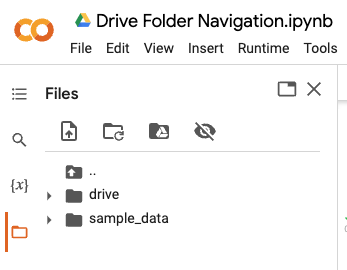

I can change the CWD to a more intuitive folder, like the one in which this file lives.

I'll say this a few times in class, and in homework assignments:  I will have you save files in /IMGS211 that will

In [24]:
os.chdir('/content/drive/MyDrive/IMGS211')

In [25]:
os.listdir()

['viewingCondition1_data.csv',
 'viewingCondition2_data.csv',
 'lensMTF_data.csv',
 'NETD_data.csv',
 'moistureContent_data',
 'moistureContent_data.csv',
 'eye1.jpg']

That works!

In [29]:
image_data = cv2.imread('eye1.jpg')

![](https://raw.githubusercontent.com/gabrielDiaz-performlab/IMGS-211-Instructional-Notebooks/main/images/eye1.jpg)

Great!  Note that to read the image is not the same as showing the image, even if colab does present the image by defaule.

cv2.imshow() may be useful to you in the future.  Notice, though, that the usual module throws an error in colab.

In [37]:
cv2.imshow(image_data)

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


Time to freak out!  Message your TAs!  Start drafting quippy comments for your hypoer-negative course evaluation!    

Wait, wait.  Maybe we're getting ahead of ourselves. Let's first *carefully* read the error message and see if it can help us.  

It says:



```
DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow
```

Let's try that.



In [34]:
from google.colab.patches import cv2_imshow

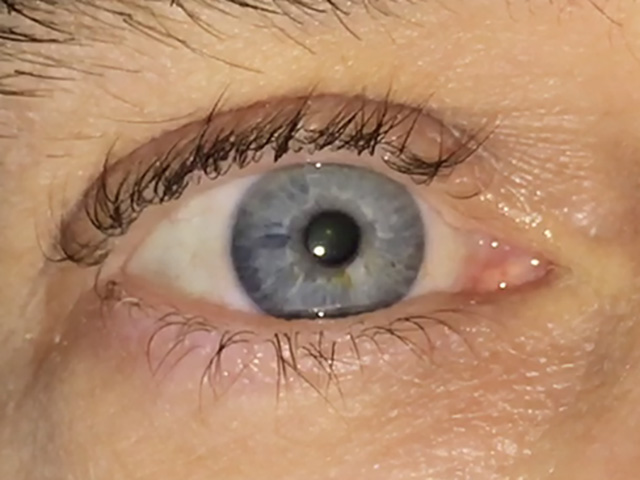

In [36]:
cv2_imshow(image_data)

Success!

# Image format and exploration

What type of data is our image?

In [40]:
print(type(image_data))

<class 'numpy.ndarray'>


A numpy array!  Let's explore it.

In [41]:
import numpy
np.shape(image_data)

(480, 640, 3)

The image is 480 rows x 640 columns x 3 color channels large.

Know that opencv natively reads images in the BGR format and, when displaying images, assumes that they are in BGR.

Let's isolate the channels.

In [45]:
blue_channel = image_data[:,:,0]
green_channel = image_data[:,:,1]
red_channel = image_data[:,:,2]

In [44]:
np.shape(green_channel)

(480, 640)

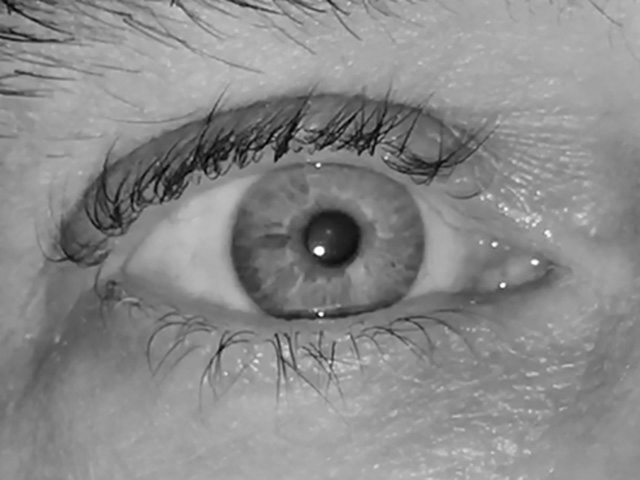

In [46]:
cv2_imshow(green_channel)

Using hstack, we can stack the matrices in a way that makes it convenient to display them as a single image.

In [48]:
seperate_channels = np.hstack([blue_channel,green_channel,red_channel])

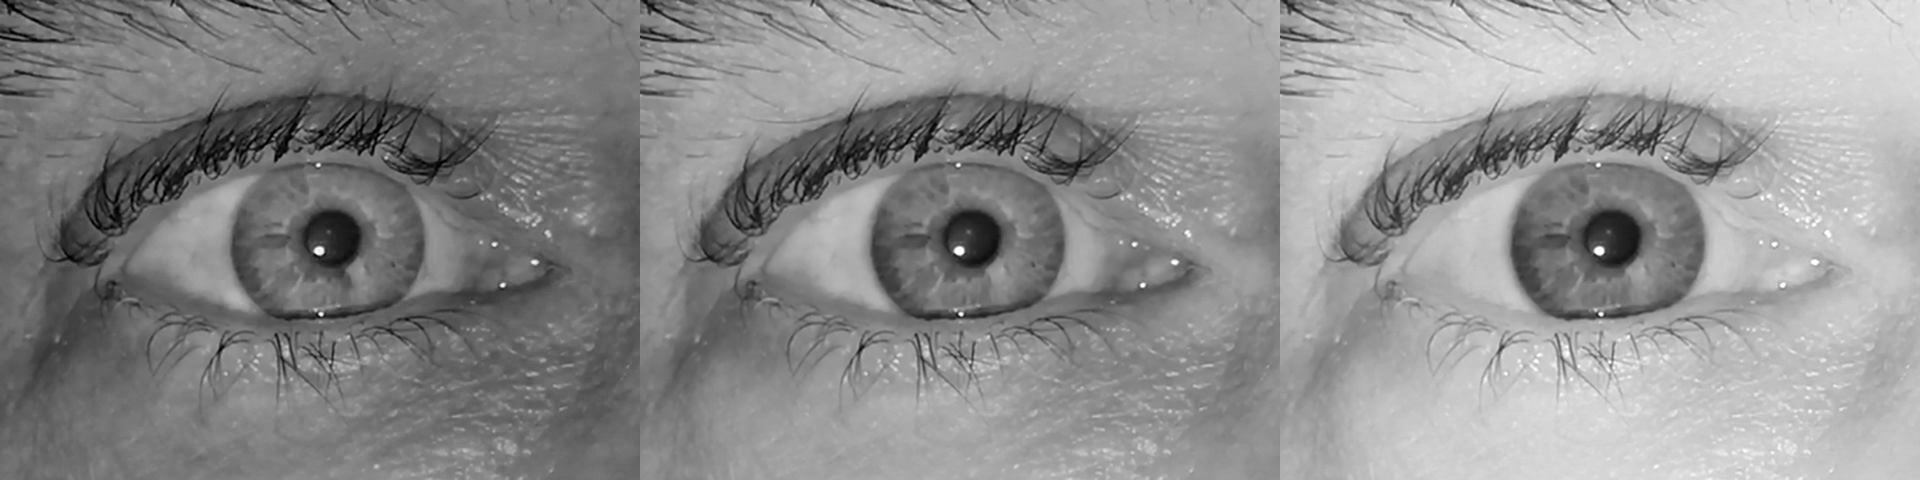

In [49]:
cv2_imshow(seperate_channels)

Plot an image histogram

(array([   72.,   237.,   475.,   421.,   445.,   431.,   587.,   514.,
          820.,  1062.,   959.,  1175.,  1226.,  1445.,  1297.,  1849.,
         2069.,  1797.,  3069.,  3556.,  4228.,  3461.,  4643.,  4494.,
         3959.,  5446.,  5084.,  5789.,  5345.,  6961.,  8157., 10996.,
        10249., 13786., 16482., 16310., 24053., 26325., 26621., 18708.,
        28200., 22407.,  7974.,  2445.,   779.,   316.,   144.,   109.,
           74.,   149.]),
 array([ 19.  ,  23.72,  28.44,  33.16,  37.88,  42.6 ,  47.32,  52.04,
         56.76,  61.48,  66.2 ,  70.92,  75.64,  80.36,  85.08,  89.8 ,
         94.52,  99.24, 103.96, 108.68, 113.4 , 118.12, 122.84, 127.56,
        132.28, 137.  , 141.72, 146.44, 151.16, 155.88, 160.6 , 165.32,
        170.04, 174.76, 179.48, 184.2 , 188.92, 193.64, 198.36, 203.08,
        207.8 , 212.52, 217.24, 221.96, 226.68, 231.4 , 236.12, 240.84,
        245.56, 250.28, 255.  ]),
 <BarContainer object of 50 artists>)

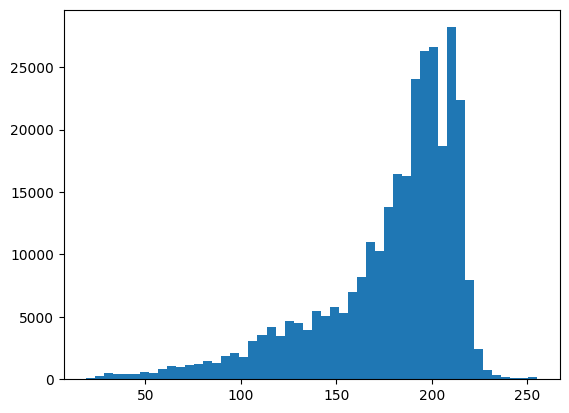

In [59]:
import matplotlib.pyplot as plt

plt.hist(red_channel.flat,bins=50)

# plt.xlim([-5,5])
# plt.xlabel('value')
# plt.ylabel('count')